In [ ]:
#Import library
import pandas as pd
import numpy as np
import random
import math
from pandas.core.frame import DataFrame
# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
# Hiding warnings
import warnings
warnings.filterwarnings("ignore")
# Encoder of categorical variables
from sklearn.preprocessing import OrdinalEncoder,StandardScaler,LabelEncoder
# k fold cross validatio
from sklearn.model_selection import cross_val_score
# Model Selection for Cross Validation
from sklearn.model_selection import  train_test_split
# Machine Learning metrics
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
# ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Deep Learning/Data Project/stroke_prediction_dataset.csv")
data_df.head(10)

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,...,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
0,18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,...,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
1,62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,...,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
2,32145,Dhanush Balan,26,Male,1,1,Married,Never Worked,Rural,189.00,...,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
3,6154,Ivana Baral,73,Male,0,0,Married,Never Worked,Urban,185.29,...,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke
4,48973,Darshit Jayaraman,51,Male,1,1,Divorced,Self-employed,Urban,177.34,...,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke
5,29307,Advika Kota,62,Female,0,0,Single,Private,Urban,91.60,...,Social Drinker,High,0,No,Gluten-Free,4.85,132/64,"HDL: 80, LDL: 69",Severe Fatigue,Stroke
6,25525,Elakshi Karan,40,Female,1,0,Married,Private,Urban,77.83,...,Never,Low,1,No,Vegetarian,6.38,178/105,"HDL: 31, LDL: 134",NaN,No Stroke
7,4809,Shalv Dugar,61,Female,0,1,Divorced,Government Job,Rural,194.73,...,Rarely,Moderate,1,No,Vegan,5.85,179/72,"HDL: 66, LDL: 134",Loss of Balance,Stroke
8,7372,Raghav Handa,72,Female,1,1,Married,Self-employed,Rural,72.99,...,Rarely,High,1,No,Vegetarian,0.73,141/106,"HDL: 71, LDL: 140","Loss of Balance, Dizziness, Difficulty Speaking",Stroke
9,37504,Krish Kulkarni,82,Male,0,0,Divorced,Self-employed,Urban,111.23,...,Rarely,High,1,Yes,Non-Vegetarian,8.39,119/88,"HDL: 32, LDL: 88",NaN,No Stroke


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient ID                15000 non-null  int64  
 1   Patient Name              15000 non-null  object 
 2   Age                       15000 non-null  int64  
 3   Gender                    15000 non-null  object 
 4   Hypertension              15000 non-null  int64  
 5   Heart Disease             15000 non-null  int64  
 6   Marital Status            15000 non-null  object 
 7   Work Type                 15000 non-null  object 
 8   Residence Type            15000 non-null  object 
 9   Average Glucose Level     15000 non-null  float64
 10  Body Mass Index (BMI)     15000 non-null  float64
 11  Smoking Status            15000 non-null  object 
 12  Alcohol Intake            15000 non-null  object 
 13  Physical Activity         15000 non-null  object 
 14  Stroke

In [ ]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Patient ID,15000.0,49715.802867,29000.656642,1.00,24562.0000,49448.00,75112.0000,99975.0
Age,15000.0,54.035667,21.063111,18.00,36.0000,54.00,72.0000,90.0
Hypertension,15000.0,0.249000,0.432448,0.00,0.0000,0.00,0.0000,1.0
Heart Disease,15000.0,0.502933,0.500008,0.00,0.0000,1.00,1.0000,1.0
Average Glucose Level,15000.0,129.445209,40.487792,60.00,94.5175,128.90,164.5925,200.0
Body Mass Index (BMI),15000.0,27.474302,7.230201,15.01,21.1600,27.42,33.7200,40.0
Stroke History,15000.0,0.500267,0.500017,0.00,0.0000,1.00,1.0000,1.0
Stress Levels,15000.0,5.022694,2.873223,0.00,2.5400,5.05,7.5200,10.0


#Trực quan hóa dữ liệu

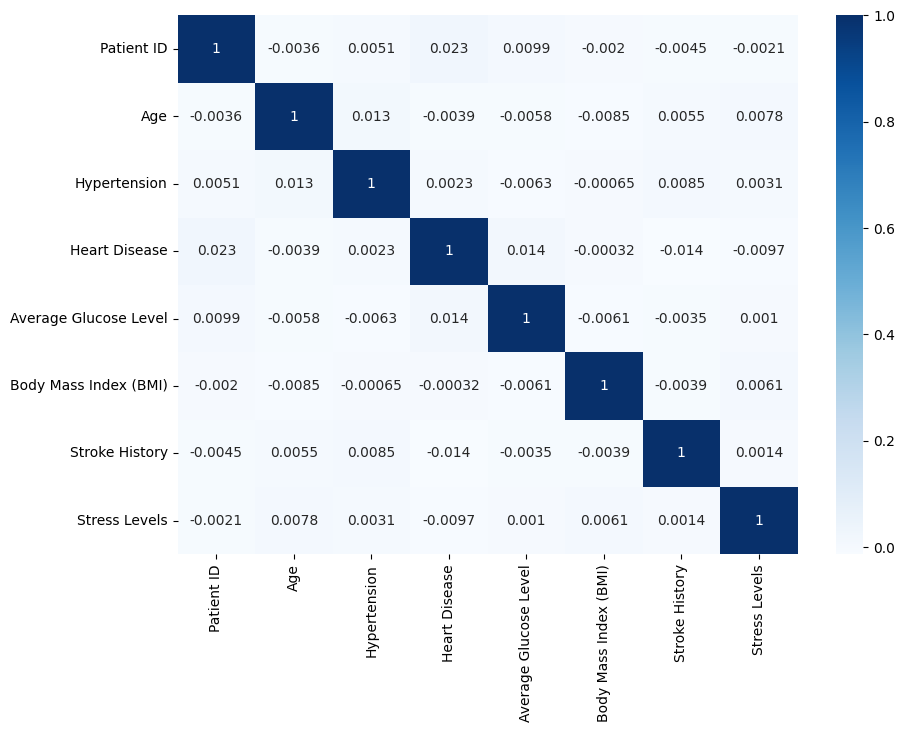

In [ ]:
# Biểu đồ tương quan
plt.figure(figsize=(10,7))
sns.heatmap(data_df.corr(), annot=True , cmap= plt.cm.Blues)
plt.show();

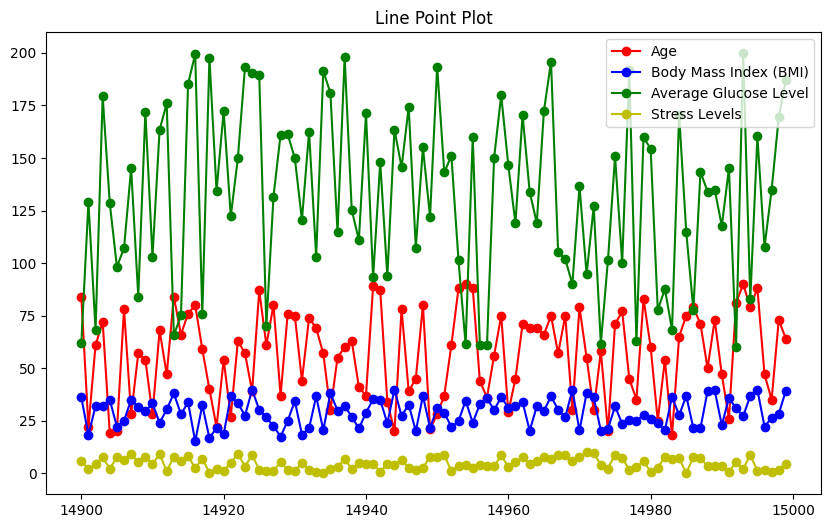

In [ ]:
# Biểu đồ line point
plt.figure(figsize=(10, 6))
plt.plot(data_df['Age'].tail(100), linestyle = '-', marker = 'o',c = 'r',label ="Age")
plt.plot(data_df['Body Mass Index (BMI)'].tail(100), linestyle = '-', marker = 'o', c = 'b',label ="Body Mass Index (BMI)")
plt.plot(data_df['Average Glucose Level'].tail(100), linestyle = '-', marker = 'o', c ='g',label ="Average Glucose Level")
plt.plot(data_df['Stress Levels'].tail(100), linestyle = '-', marker = 'o', c = 'y',label ="Stress Levels")
plt.legend()
plt.title("Line Point Plot")
plt.show()

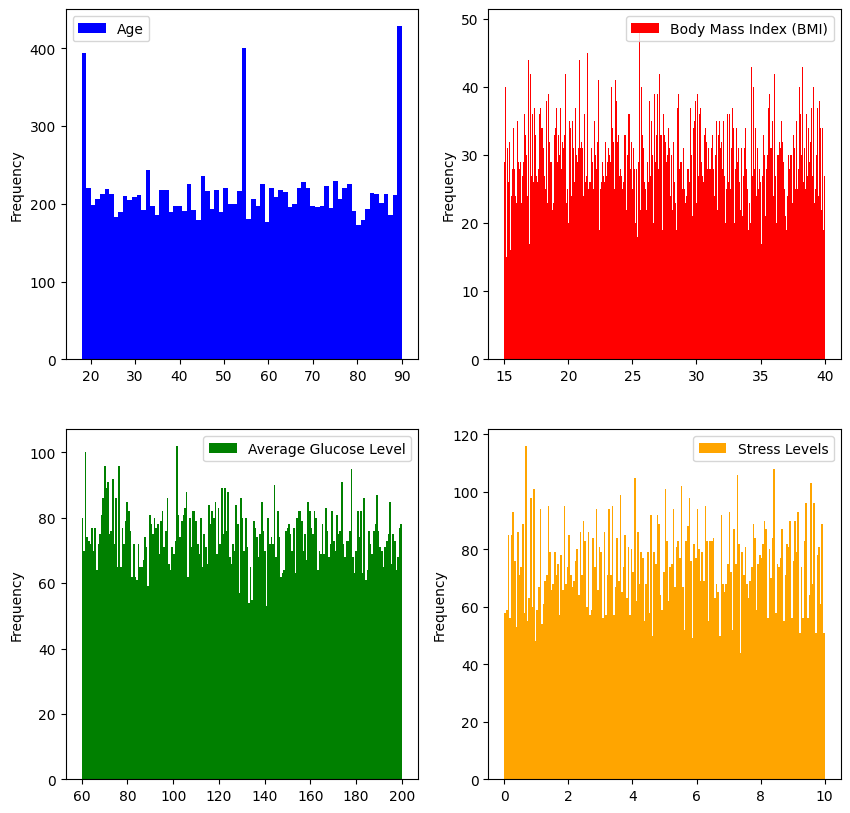

In [ ]:
# Tính năng phương sai phân phối
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
data_df.plot(kind="hist", y="Age", bins=70, color="b", ax=axes[0][0])
data_df.plot(kind="hist", y="Body Mass Index (BMI)", bins=500, color="r", ax=axes[0][1])
data_df.plot(kind="hist", y="Average Glucose Level", bins=200, color="g", ax=axes[1][0])
data_df.plot(kind="hist", y="Stress Levels", bins=200, color="orange", ax=axes[1][1])
plt.show()

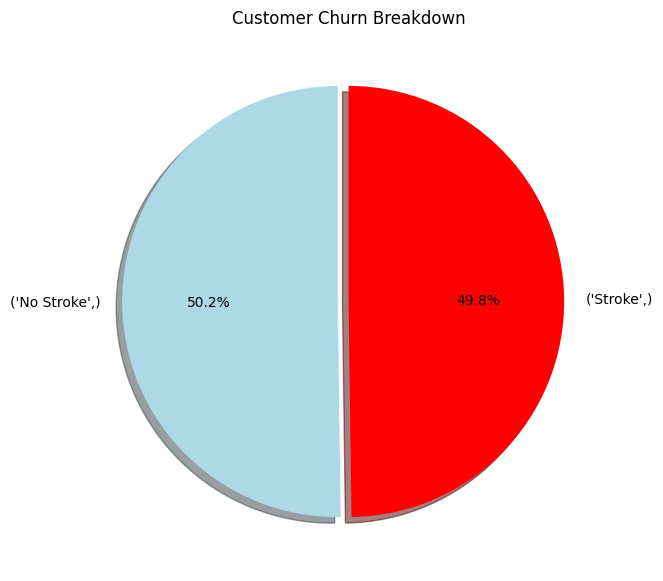

In [ ]:
# Tỉ lệ bị đột quỵ
data= data_df
y = DataFrame(data['Diagnosis'])
labels =y.value_counts(sort = True).index
# .index sắp xếp thứ tự (giảm dần) số lần xuất hiện cửa giá trị
sizes = y.value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.05,0)

plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)
# autopct='%1.1f%% (Dùng để tính phần trăm) cho hình tron
plt.title('Customer Churn Breakdown')
plt.show()
y.value_counts();

=>Theo như biểu đồ trên ta thấy được số người mắc bệnh đột quỵ chiếm một nửa

<Figure size 500x200 with 0 Axes>

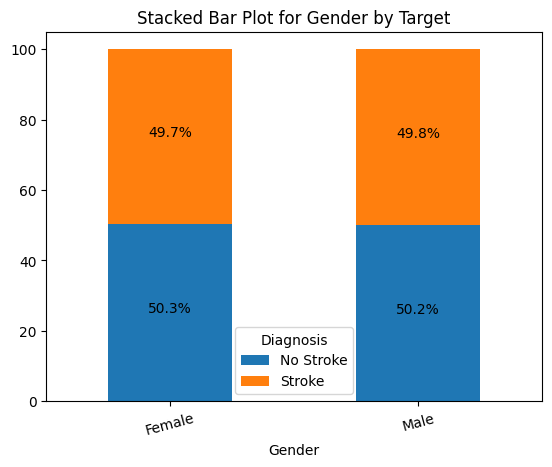

Số người bị đột quy là: 7468
Số nam giới bị đột quỵ là: 3799 (50.87%)
Số nữ giới bị đột quỵ là: 3669 (49.13%)


In [ ]:
# Số người mắc bệnh đột quỵ ở Nam và nữ
stroke = data_df.loc[data_df['Diagnosis']=='Stroke'] # .loc[] Phương thức của DataFrame dùng để chọn các hàng dựa trên điều kiện
gender_counts_stroke = data[data['Diagnosis'] == 'Stroke']['Gender'].value_counts()
ct = pd.crosstab(data_df['Gender'], data_df['Diagnosis'], normalize='index') * 100  # Calculate percentages
plt.figure(figsize=(5, 2))
ax = ct.plot(kind='bar', stacked=True)
for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center')
plt.xticks(rotation=15)
plt.title(f'Stacked Bar Plot for Gender by Target')
plt.xlabel('Gender')
plt.show()
print("Số người bị đột quy là: {}".format(gender_counts_stroke.sum()))
print("Số nam giới bị đột quỵ là: {} ({:.2f}%)".format(gender_counts_stroke[0], (gender_counts_stroke[0]/gender_counts_stroke.sum()*100)))
print("Số nữ giới bị đột quỵ là: {} ({:.2f}%)".format(gender_counts_stroke[1], (gender_counts_stroke[1]/gender_counts_stroke.sum()*100)))

Phần trăm mắc bệnh đột quỵ ở Nam và nữa giới

-> Từ dữ liệu trên ta thấy được rằng tỷ lệ mắc bệnh đột quỵ ở cả nam và nữ giới đều sắm sĩ 50%

<Figure size 500x200 with 0 Axes>

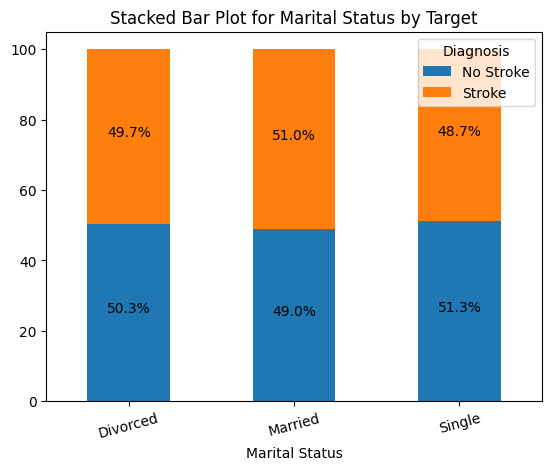

In [ ]:
ct = pd.crosstab(data_df['Marital Status'], data_df['Diagnosis'], normalize='index') * 100  # Calculate percentages
plt.figure(figsize=(5, 2))
ax = ct.plot(kind='bar', stacked=True)
for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center')
plt.xticks(rotation=15)
plt.title(f'Stacked Bar Plot for Marital Status by Target')
plt.xlabel('Marital Status')
plt.show();

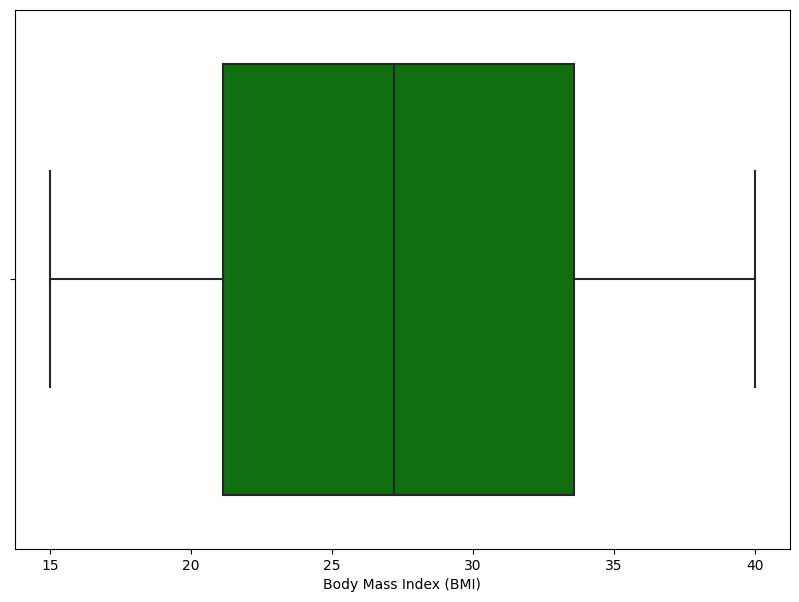

In [ ]:
# Thể hiện bmi của người mắc bệnh đột quỵ
plt.figure(figsize=(10,7))
sns.boxplot(data=data_df,x=stroke["Body Mass Index (BMI)"],color='green');

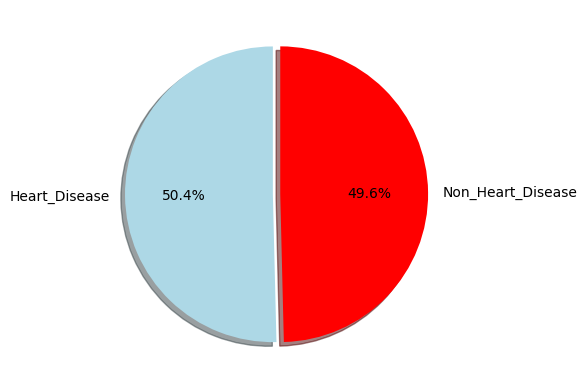

Hear_Disease: 3763
Non_Hear_Disease: 3705


In [ ]:
# Tỉ lệ đột quy khi có bệnh án bị bệnh tim
heart_ds =data_df['Heart Disease']
h_str=stroke[stroke['Heart Disease']==1]
nh_str=stroke[stroke['Heart Disease']==0]
labels_h = 'Heart_Disease','Non_Heart_Disease'
sizes_h = [h_str['Heart Disease'].count(),nh_str['Heart Disease'].count()]
plt.pie(sizes_h, explode=explode, labels=labels_h, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)
plt.show()

print('Hear_Disease: {}'.format(h_str['Heart Disease'].count()))
print('Non_Hear_Disease: {}'.format(nh_str['Heart Disease'].count()))

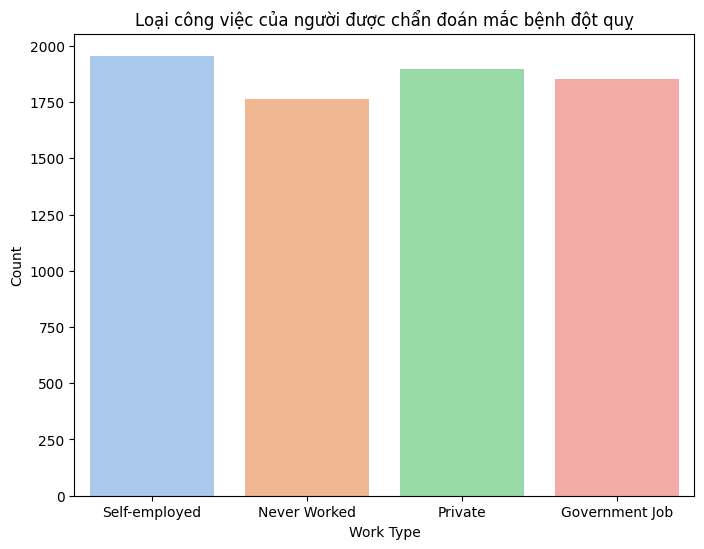

In [ ]:
# Lọc dữ liệu để chẩn đoán đột quỵ
diagnosed_stroke_data = data_df[data_df['Diagnosis'] == 'Stroke']
# Creating a count plot
plt.figure(figsize=(8, 6))
sns.countplot(data =diagnosed_stroke_data, x='Work Type', palette='pastel')
plt.title('Loại công việc của người được chẩn đoán mắc bệnh đột quỵ')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.show()

Ta có thể thấy được những người làm loại công việc "Self-employed" và "Private " có tỉ lệ mắc bệnh đột quỵ cao hơn những loại công việc khác

#Tiền xử lí dữ liệu

In [ ]:
# Checking if our dataset contains any NULL values

data_df.isnull().sum()

Patient ID                     0
Patient Name                   0
Age                            0
Gender                         0
Hypertension                   0
Heart Disease                  0
Marital Status                 0
Work Type                      0
Residence Type                 0
Average Glucose Level          0
Body Mass Index (BMI)          0
Smoking Status                 0
Alcohol Intake                 0
Physical Activity              0
Stroke History                 0
Family History of Stroke       0
Dietary Habits                 0
Stress Levels                  0
Blood Pressure Levels          0
Cholesterol Levels             0
Symptoms                    2500
Diagnosis                      0
dtype: int64

In [ ]:
#Xử lý các dữ liệu null
drop_row_index = data_df[pd.isnull(data_df).any(axis=1)].index
data_df.drop(drop_row_index)
data_df = data_df.dropna()
data_df.head(5)

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,...,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
0,18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,...,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
1,62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,...,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
2,32145,Dhanush Balan,26,Male,1,1,Married,Never Worked,Rural,189.00,...,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
3,6154,Ivana Baral,73,Male,0,0,Married,Never Worked,Urban,185.29,...,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke
4,48973,Darshit Jayaraman,51,Male,1,1,Divorced,Self-employed,Urban,177.34,...,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke


In [ ]:
#Kiểm tra thuộc tính Cholesterol Levels
data_df['Cholesterol Levels']

0        HDL: 68, LDL: 133
1         HDL: 63, LDL: 70
2         HDL: 59, LDL: 95
3        HDL: 70, LDL: 137
4         HDL: 65, LDL: 68
               ...        
14994     HDL: 60, LDL: 65
14996    HDL: 35, LDL: 183
14997    HDL: 57, LDL: 159
14998     HDL: 79, LDL: 91
14999    HDL: 78, LDL: 179
Name: Cholesterol Levels, Length: 12500, dtype: object

In [ ]:
#Tiến hành tách dữ liệu cột 'Cholesterol Levels' Thành 2 cột 'HDL' và 'LDL'
data_df[['HDL', 'LDL']]=data_df['Cholesterol Levels'].str.extract(r'HDL: (\d+), LDL: (\d+)')
data_df['HDL'] = pd.to_numeric(data_df['HDL'])
data_df['LDL'] = pd.to_numeric(data_df['LDL'])

In [ ]:
data_df['Blood Pressure Levels']

0        140/108
1         146/91
2         154/97
3         174/81
4         121/95
          ...   
14994     100/99
14996     155/71
14997    121/110
14998     157/74
14999     133/81
Name: Blood Pressure Levels, Length: 12500, dtype: object

In [ ]:
#Tách dữ liệu 'Blood Pressure Levels' thành 2 cột 'Upper BP' và Lower BD'
data_df[['Upper BP', 'Lower BP']] = data_df['Blood Pressure Levels'].str.extract(r'(\d+)/(\d+)')
data_df['Upper BP'] = pd.to_numeric(data_df['Upper BP'])
data_df['Lower BP'] = pd.to_numeric(data_df['Lower BP'])

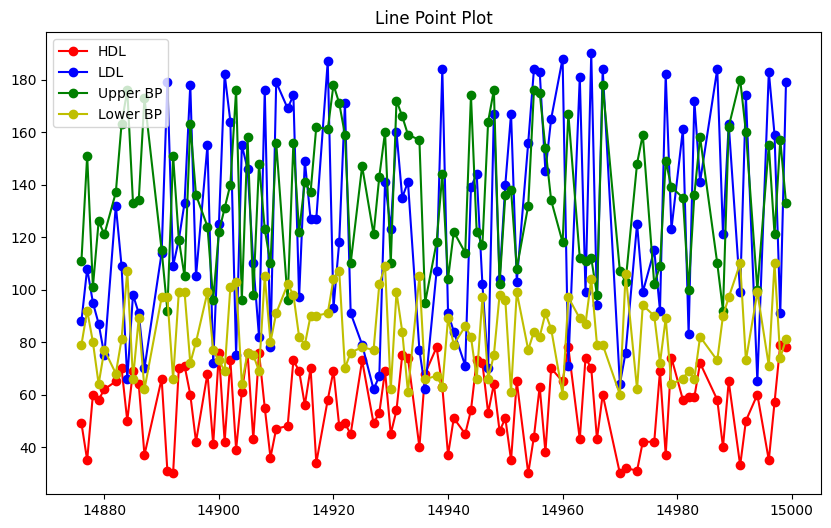

In [ ]:
# Biểu đồ line point
plt.figure(figsize=(10, 6))
plt.plot(data_df['HDL'].tail(100), linestyle = '-', marker = 'o',c = 'r',label ="HDL")
plt.plot(data_df['LDL'].tail(100), linestyle = '-', marker = 'o', c = 'b',label ="LDL")
plt.plot(data_df['Upper BP'].tail(100), linestyle = '-', marker = 'o', c ='g',label ="Upper BP")
plt.plot(data_df['Lower BP'].tail(100), linestyle = '-', marker = 'o', c = 'y',label ="Lower BP")
plt.legend()
plt.title("Line Point Plot")
plt.show()

In [ ]:
#Xóa các cột không cần thiết cho mô hình hồi quy ('Patient ID','Patient Name','Blood Pressure Levels','Cholesterol Levels','Symptoms')
data_df = data_df.drop(['Patient ID','Patient Name','Blood Pressure Levels','Cholesterol Levels','Symptoms'], axis = 1)
print(data_df.columns)

Index(['Age', 'Gender', 'Hypertension', 'Heart Disease', 'Marital Status',
       'Work Type', 'Residence Type', 'Average Glucose Level',
       'Body Mass Index (BMI)', 'Smoking Status', 'Alcohol Intake',
       'Physical Activity', 'Stroke History', 'Family History of Stroke',
       'Dietary Habits', 'Stress Levels', 'Diagnosis', 'HDL', 'LDL',
       'Upper BP', 'Lower BP'],
      dtype='object')


In [ ]:
data_df.head(5)

,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,Body Mass Index (BMI),Smoking Status,...,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Diagnosis,HDL,LDL,Upper BP,Lower BP
0,56,Male,0,1,Married,Self-employed,Rural,130.91,22.37,Non-smoker,...,Moderate,0,Yes,Vegan,3.48,Stroke,68,133,140,108
1,80,Male,0,0,Single,Self-employed,Urban,183.73,32.57,Non-smoker,...,Low,0,No,Paleo,1.73,Stroke,63,70,146,91
2,26,Male,1,1,Married,Never Worked,Rural,189.00,20.32,Formerly Smoked,...,High,0,Yes,Paleo,7.31,Stroke,59,95,154,97
3,73,Male,0,0,Married,Never Worked,Urban,185.29,27.50,Non-smoker,...,Moderate,0,No,Paleo,5.35,No Stroke,70,137,174,81
4,51,Male,1,1,Divorced,Self-employed,Urban,177.34,29.06,Currently Smokes,...,Low,0,Yes,Pescatarian,6.84,Stroke,65,68,121,95


In [ ]:
#Di chuyển thuộc tính Diagnosis đến cuối bộ dữ liệu
moving_column=data_df.pop('Diagnosis')
data_df.insert(20,'Diagnosis',moving_column)
data_df

,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,Body Mass Index (BMI),Smoking Status,...,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,HDL,LDL,Upper BP,Lower BP,Diagnosis
0,56,Male,0,1,Married,Self-employed,Rural,130.91,22.37,Non-smoker,...,Moderate,0,Yes,Vegan,3.48,68,133,140,108,Stroke
1,80,Male,0,0,Single,Self-employed,Urban,183.73,32.57,Non-smoker,...,Low,0,No,Paleo,1.73,63,70,146,91,Stroke
2,26,Male,1,1,Married,Never Worked,Rural,189.00,20.32,Formerly Smoked,...,High,0,Yes,Paleo,7.31,59,95,154,97,Stroke
3,73,Male,0,0,Married,Never Worked,Urban,185.29,27.50,Non-smoker,...,Moderate,0,No,Paleo,5.35,70,137,174,81,No Stroke
4,51,Male,1,1,Divorced,Self-employed,Urban,177.34,29.06,Currently Smokes,...,Low,0,Yes,Pescatarian,6.84,65,68,121,95,Stroke
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,79,Female,0,1,Divorced,Private,Rural,82.69,36.82,Currently Smokes,...,Low,1,Yes,Vegetarian,8.69,60,65,100,99,No Stroke
14996,47,Female,0,0,Married,Private,Urban,107.58,22.17,Non-smoker,...,Low,1,No,Gluten-Free,1.47,35,183,155,71,No Stroke
14997,35,Male,0,0,Married,Government Job,Rural,134.90,26.38,Non-smoker,...,High,1,No,Paleo,0.51,57,159,121,110,Stroke
14998,73,Male,0,0,Single,Self-employed,Urban,169.42,28.32,Non-smoker,...,High,0,Yes,Paleo,1.53,79,91,157,74,No Stroke


#Encoding Categorical Data (Mã hóa dữ liệu phân loại)

TTrong tập dữ liệu này, chúng ta có hai loại dữ liệu phân loại: Ordinal (thứ tự) và Nominal (danh nghĩa). Dữ liệu thứ tự là những dữ liệu có thể được xếp hạng hoặc sắp xếp, hiển thị sự khác biệt giữa các giá trị (Physical Activity).
Dữ liệu danh nghĩa là những dữ liệu mà nhãn không có thứ tự hoặc xếp hạng vốn có (Gender, Marital Status, Work Type, Residence Type, Smoking Status, Alcohol Intake, Family History of Stroke, Dietary Habits ).
Đầu tiên, chúng ta sẽ sử dụng OrdinalEncode của Scikit-Learn để mã hóa các biến thứ tự. OrdinalEncode hoạt động bằng cách mã hóa các biến từ 0 đến n , ở đâu n đại diện cho tổng số nhãn trong thuộc tính.
Ví dụ: đối với Physical Activity , các giá trị sẽ được mã hóa theo thứ tự sau:
Low = 0
Moderate = 1
High = 2.


Trong ô tiếp theo, chúng tôi mã hóa các tính năng thứ tự và hiển thị khung dữ liệu kết quả sau khi mã hóa.


In [ ]:
# Lấy các cột có type là float và int
int_columns = data_df.select_dtypes(include=['int','float'])
int_columns_names = int_columns.columns.tolist()
int_columns_names

['Age',
 'Hypertension',
 'Heart Disease',
 'Average Glucose Level',
 'Body Mass Index (BMI)',
 'Stroke History',
 'Stress Levels',
 'HDL',
 'LDL',
 'Upper BP',
 'Lower BP']

In [ ]:
# Defining orders for labels
value_orders = [
    ['Low', 'Moderate','High']
]

# Using OrdinalEncoder to encode 'Physical Activity' attributes.
oe = OrdinalEncoder(categories = value_orders)
data_df[['Physical Activity']] = oe.fit_transform(data_df[['Physical Activity']])
data_df.head(5)

,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,Body Mass Index (BMI),Smoking Status,...,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,HDL,LDL,Upper BP,Lower BP,Diagnosis
0,56,Male,0,1,Married,Self-employed,Rural,130.91,22.37,Non-smoker,...,1.0,0,Yes,Vegan,3.48,68,133,140,108,Stroke
1,80,Male,0,0,Single,Self-employed,Urban,183.73,32.57,Non-smoker,...,0.0,0,No,Paleo,1.73,63,70,146,91,Stroke
2,26,Male,1,1,Married,Never Worked,Rural,189.00,20.32,Formerly Smoked,...,2.0,0,Yes,Paleo,7.31,59,95,154,97,Stroke
3,73,Male,0,0,Married,Never Worked,Urban,185.29,27.50,Non-smoker,...,1.0,0,No,Paleo,5.35,70,137,174,81,No Stroke
4,51,Male,1,1,Divorced,Self-employed,Urban,177.34,29.06,Currently Smokes,...,0.0,0,Yes,Pescatarian,6.84,65,68,121,95,Stroke


Đối với dữ liệu danh nghĩa, chúng tôi sẽ sử dụng Label của Scikit-Learn, có cách tiếp cận hơi khác. Bộ mã hóa này hoạt động bằng cách trích xuất các nhãn từ đối tượng địa lý được phân loại và sử dụng chúng để tạo các đối tượng địa lý mới. Các tính năng này lấy các giá trị nhị phân, 0 hoặc 1, dùng để cho biết liệu một nhãn cụ thể có hiện diện hay không trong một mẫu nhất định.

In [ ]:
# Lấy các cột có type là object
string_columns = data_df.select_dtypes(include=['object'])
string_columns_names = string_columns.columns.tolist()
string_columns_names

['Gender',
 'Marital Status',
 'Work Type',
 'Residence Type',
 'Smoking Status',
 'Alcohol Intake',
 'Family History of Stroke',
 'Dietary Habits',
 'Diagnosis']

In [ ]:
# Chuyển hóa object thành 0 và 1
for column in string_columns_names:
  data_df[column]= LabelEncoder().fit_transform(data_df[column].astype('str'))
data_df.head(5)

,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,Body Mass Index (BMI),Smoking Status,...,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,HDL,LDL,Upper BP,Lower BP,Diagnosis
0,56,1,0,1,1,3,0,130.91,22.37,2,...,1.0,0,1,5,3.48,68,133,140,108,1
1,80,1,0,0,2,3,1,183.73,32.57,2,...,0.0,0,0,3,1.73,63,70,146,91,1
2,26,1,1,1,1,1,0,189.00,20.32,1,...,2.0,0,1,3,7.31,59,95,154,97,1
3,73,1,0,0,1,1,1,185.29,27.50,2,...,1.0,0,0,3,5.35,70,137,174,81,0
4,51,1,1,1,0,3,1,177.34,29.06,0,...,0.0,0,1,4,6.84,65,68,121,95,1


Đối với dữ liệu danh nghĩa, chúng tôi sẽ sử dụng LabelEncoder của Scikit-Learn, có cách tiếp cận hơi khác. Bộ mã hóa này hoạt động bằng cách trích xuất các nhãn từ đối tượng địa lý được phân loại và sử dụng chúng để tạo các đối tượng địa lý mới. Các tính năng này lấy các giá trị nhị phân, 0 hoặc 1, dùng để cho biết liệu một nhãn cụ thể có hiện diện hay không trong một mẫu nhất định.

# Xây dụng mô hình và đánh giá mô hình

Sau khi mã hóa ,chúng ta phải chia dữ liệu thành các đặc trưng X (independent) độc lập và biến mục tiêu y (target).X bao gồm mọi đặc điểm ngoài biến mục tiêu và nó sẽ được sử dụng để dự đoán mục tiêu ,trong khi sẽ bao gồm trong khi y sẽ bao gồm cột Salary in USD.

In [ ]:

X,y=data_df.drop('Diagnosis',axis=1) ,data_df['Diagnosis']# Splitting df into X and y
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
#Printing info on X and y
X_train.shape, X_test.shape


((10000, 20), (2500, 20))

Để đánh giá các mô hình của mình, chúng tôi sẽ sử dụng hai số liệu: RMSE và R-Square đã điều chỉnh. Các số liệu này như sau:

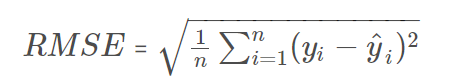


Trong đó:

• yi là giá trị thực của biến mục tiêu cho điểm dữ liệu thứ i.

• y^i là giá trị dự đoán của biến mục tiêu cho điểm dữ liệu thứ i.

• n là số điểm dữ liệu.

RMSE(Lỗi bình phương trung bình gốc) chỉ đơn giản là căn bậc hai của tổng chênh lệch bình phương giữa giá trị thực và giá trị dự đoán. Nó rất trực quan để hiểu vì nó được biểu thị theo cùng đơn vị với biến mục tiêu.

Khi so sánh hiệu suất của các mô hình khác nhau, mô hình có `RMSE thấp nhất` thường được ưu tiên hơn vì nó cho thấy sai số nhỏ hơn so với các mô hình khác.
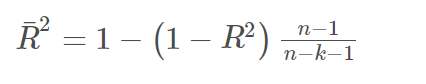

Trong đó:

• R2 đại diện cho R bình phương thông thường.

• k là số đặc trưng độc lập.

• n là số điểm dữ liệu.

R-Squared đã điều chỉnh đánh giá mức độ phù hợp của mô hình. Nó thường dao động từ 0 đến 1, với giá trị cao hơn cho thấy mức độ phù hợp tốt hơn. Nó mạnh mẽ so với R-Squared ban đầu vì nó không tăng theo số lượng biến dự đoán trong X tăng.

Chúng ta hãy xem xét một số giá trị liên quan đến y biến mục tiêu.

In [ ]:
y_range = y.max() - y.min()
y_median = y.median()
y_mean = y.mean()
print(f"Phạm vi của y: {y_range}")
print(f"Median of y: {y_median}")
print(f"Mean of y: {y_mean:.2f}")

Phạm vi của y: 1
Median of y: 0.0
Mean of y: 0.50


# Hồi quy Logistic

In [ ]:
# Tạo mô hình hồi quy
model_Logistic = LogisticRegression(solver='liblinear')
model_Logistic.fit(X_train,y_train)


LogisticRegression(solver='liblinear')

In [ ]:
#Huấn luyện
y_predict_Logistic = model_Logistic.predict(X_train)
r2 = r2_score(y_predict_Logistic,y_train)
x_ax=range(len(X_train))
mean_adjusted_r2 = np.mean(r2)
mean = mean_squared_error(y_predict_Logistic,y_train)
trainScore = sqrt(mean)
print('RMSE :',trainScore)
print(f'Mean Adjusted R-squared = {mean_adjusted_r2:.2f}')
print("Xác định độ chính xác",accuracy_score(y_train,y_predict_Logistic))

RMSE : 0.6959885056522126
Mean Adjusted R-squared = -0.94
Xác định độ chính xác 0.5156


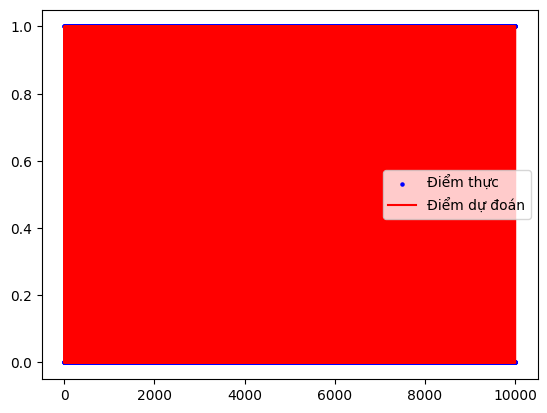

In [ ]:
#Trực quan hóa mô hình huấn luyện
plt.scatter(x_ax, y_train, s=5, color="blue", label="Điểm thực")
plt.plot(x_ax, y_predict_Logistic, lw=1.5, color="red", label="Điểm dự đoán")
plt.legend()
plt.show()

In [ ]:
#Dự đoán
y_predict_Logistic = model_Logistic.predict(X_test)
r2 = r2_score(y_predict_Logistic,y_test)
x_ax=range(len(X_test))
mean_adjusted_r2 = np.mean(r2)
mean = mean_squared_error(y_predict_Logistic,y_test)
trainScore = sqrt(mean)
print('RMSE :',trainScore)
print(f'Mean Adjusted R-squared = {mean_adjusted_r2:.2f}')
print("Xác định độ chính xác",accuracy_score(y_test,y_predict_Logistic))

RMSE : 0.7152621896899067
Mean Adjusted R-squared = -1.05
Xác định độ chính xác 0.4884


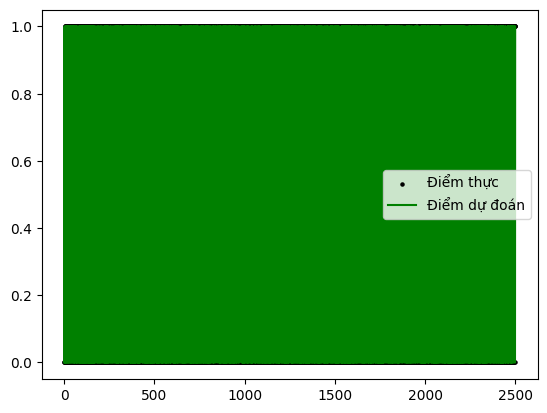

In [ ]:
#Trực quan hóa dự đoán
plt.scatter(x_ax, y_test, s=5, color="black", label="Điểm thực")
plt.plot(x_ax, y_predict_Logistic, lw=1.5, color="green", label="Điểm dự đoán")
plt.legend()
plt.show()

In [ ]:
# k fold cross validatio
cvs = cross_val_score(estimator = model_Logistic, X = X_train, y = y_train, cv = 10)
print(cvs)

[0.496 0.475 0.5   0.499 0.516 0.478 0.481 0.508 0.506 0.518]


In [ ]:
print("Mean Accuracy :", cvs.mean())
print("Variance :", cvs.std())

Mean Accuracy : 0.49770000000000003
Variance : 0.014539944979263173


#Mô hình dự đoán Logistic

In [ ]:
#Mô hình dự đoán Logistic
person =[[56,1,0,1,1,3,0,130.91,22.37,2,3,2,0,1,5,3.48,1,68,133,140]]
Logistic_predict= model_Logistic.predict(person)

print("Dự đoán đột quỵ: {}".format(Logistic_predict))

Dự đoán đột quỵ: [1]


#Hồi quy Rừng ngẫu nhiên (RandomForestRegressor)

In [ ]:
#Xây dựng mô hình rừng ngẫu nhiên
model_RandomFores = RandomForestRegressor(n_estimators=20, random_state=0)
model_RandomFores.fit(X_train,y_train)

RandomForestRegressor(n_estimators=20, random_state=0)

In [ ]:
# Huấn luyện
pred_y_RandomForest = model_RandomFores.predict(X_train)
mse = mean_squared_error(y_train, pred_y_RandomForest)
print("Mean Squared Error:",mse)
rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)
print("Xác định độ chính xác",r2_score(y_train, pred_y_RandomForest))

Mean Squared Error: 0.0417845
Root Mean Squared Error: 0.2044125729988251
Xác định độ chính xác 0.8328619732579158


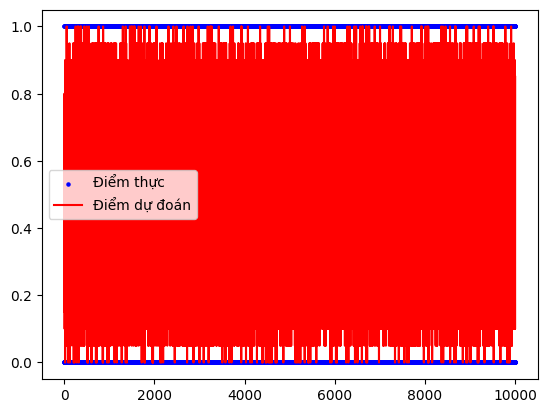

In [ ]:
#Trực quan hóa mô hình huấn luyện
x_ax=range(len(X_train))
plt.scatter(x_ax, y_train, s=5, color="blue", label="Điểm thực")
plt.plot(x_ax, pred_y_RandomForest, lw=1.5, color="red", label="Điểm dự đoán")
plt.legend()
plt.show()

In [ ]:
# Dự đoán
pred_y_RandomForest = model_RandomFores.predict(X_test)
mse = mean_squared_error(y_test, pred_y_RandomForest)
print("Mean Squared Error:",mse)
rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)
print("Xác định độ chính xác",r2_score(y_test, pred_y_RandomForest))

Mean Squared Error: 0.26811199999999996
Root Mean Squared Error: 0.5177953263597499
Xác định độ chính xác -0.07245417733606141


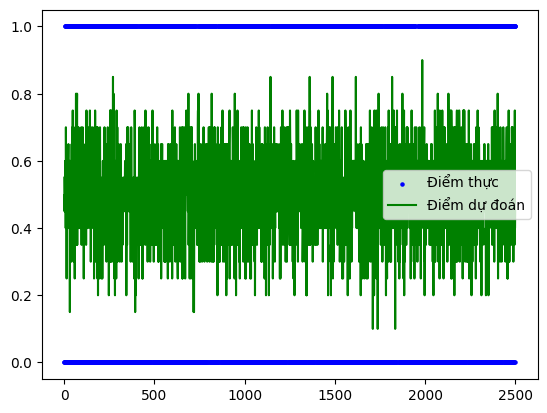

In [ ]:
x_ax=range(len(X_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="Điểm thực")
plt.plot(x_ax, pred_y_RandomForest, lw=1.5, color="green", label="Điểm dự đoán")
plt.legend()
plt.show()

#Dự đoán RandomForestRegressor

In [ ]:
#Dự đoán RandomForestRegressor
person =[(56,1,0,1,1,3,0,130.91,22.37,2,3,2,0,1,5,3.48,1,68,133,140)]
RanomFores_predict= model_RandomFores.predict(person)
print("Dự đoán đột quỵ: ",RanomFores_predict)


Dự đoán đột quỵ:  [0.5]
